In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
#abro el data frame
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Voy a hacer un analisis por location

In [3]:
datos.location.describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [4]:
datos.location.shape

(7613,)

In [5]:
#Agrego una columna con la longitud de los tweets ya que la voy a necsitar luego
datos['longitudTweet']=datos.text.str.len()
datos.head()

,id,keyword,location,text,target,longitudTweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [7]:
datos.location.isna().sum()

2533

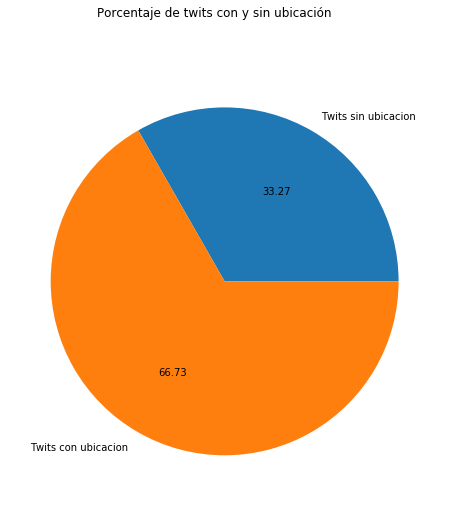

In [8]:
#hago un grafico de torta mostrando la cantidad de cuentas que tienen una location asociada
sinLocation=datos.location.isna().sum()*100/datos.location.shape[0]
plt.figure(figsize=(12, 8))
plt.pie(x=[sinLocation,100-sinLocation],labels=['Twits sin ubicacion','Twits con ubicacion'],
        autopct="%.2f")
plt.suptitle("Porcentaje de twits con y sin ubicación")
plt.show()

Analizo el porcentaje de veracidad de los twits con ubicacion

In [9]:
conUbicacion =  datos[datos['location'].notna()]
conUbicacion.describe()

,id,target,longitudTweet
count,5080.000000,5080.000000,5080.000000
mean,5407.112598,0.432283,102.740157
std,3116.359041,0.495442,33.678942
min,48.000000,0.000000,8.000000
25%,2728.750000,0.000000,79.000000
50%,5360.500000,0.000000,109.000000
75%,8086.000000,1.000000,135.000000
max,10833.000000,1.000000,163.000000


In [10]:
propTrue = conUbicacion.target.sum()*100/conUbicacion.target.count()
propTrue

43.22834645669291

In [11]:
#Selecciono twits que tengan location no unicos, ya que considero que los unicos pueden no ser lugares reales
propTrueDobles = conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].target.sum()*100/conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].target.count()
propTrueDobles

48.36427939876216

In [12]:
#Hago lo mismo para los twits con ubicacion nula 
sinUbicacion =  datos[datos['location'].isnull()]
sinUbicacion.describe()

,id,target,longitudTweet
count,2533.000000,2533.000000,2533.000000
mean,5511.771812,0.424398,98.893802
std,3177.805626,0.494349,34.687788
min,1.000000,0.000000,7.000000
25%,2757.000000,0.000000,75.000000
50%,5535.000000,0.000000,104.000000
75%,8247.000000,1.000000,132.000000
max,10873.000000,1.000000,158.000000


In [138]:
#Selecciono twits que tengan location no unicos, ya que considero que los unicos pueden no ser lugares reales
propTrueSinUb = sinUbicacion.target.sum()*100/sinUbicacion.target.count()
propTrueSinUb

42.43979470983024

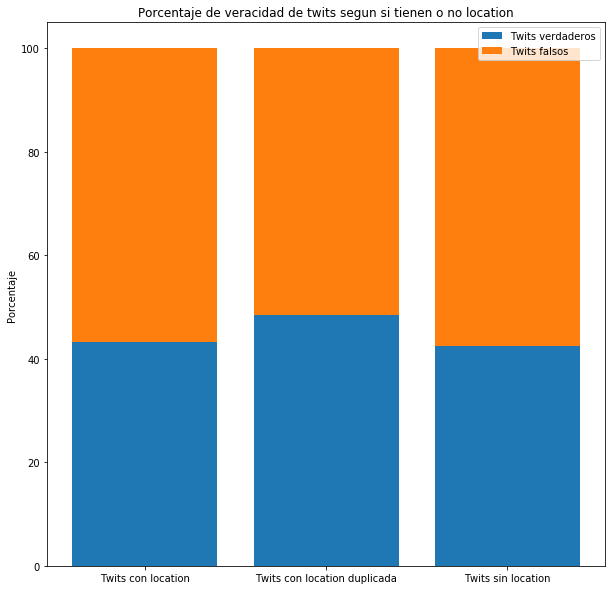

In [14]:
#hago un grafico de stacked bar 
fig, ax = plt.subplots(figsize=(10,10))
labels = ['Twits con location','Twits con location duplicada','Twits sin location']
porcentajesTrue = [propTrue,propTrueDobles,propTrueSinUb]
porcentajesFalse = [100-x for x in porcentajesTrue]
ax.bar(labels, porcentajesTrue,  label='Twits verdaderos')
ax.bar(labels, porcentajesFalse,  bottom=porcentajesTrue,
       label='Twits falsos')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de veracidad de twits segun si tienen o no location')
ax.legend()

plt.show()

Analizo la longitud promedio de los twits dependiendon si tienen un location o no

In [15]:
meanMinMaxSinUb =sinUbicacion.describe()
meanMinMaxSinUb

,id,target,longitudTweet
count,2533.000000,2533.000000,2533.000000
mean,5511.771812,0.424398,98.893802
std,3177.805626,0.494349,34.687788
min,1.000000,0.000000,7.000000
25%,2757.000000,0.000000,75.000000
50%,5535.000000,0.000000,104.000000
75%,8247.000000,1.000000,132.000000
max,10873.000000,1.000000,158.000000


In [16]:
meanMinMaxConUb =conUbicacion.describe()
meanMinMaxConUb

,id,target,longitudTweet
count,5080.000000,5080.000000,5080.000000
mean,5407.112598,0.432283,102.740157
std,3116.359041,0.495442,33.678942
min,48.000000,0.000000,8.000000
25%,2728.750000,0.000000,79.000000
50%,5360.500000,0.000000,109.000000
75%,8086.000000,1.000000,135.000000
max,10833.000000,1.000000,163.000000


In [17]:
meanMinMaxConUbDupl = conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].describe()
meanMinMaxConUbDupl

,id,target,longitudTweet
count,2262.000000,2262.000000,2262.000000
mean,5378.631300,0.483643,107.429708
std,3119.597675,0.499843,31.233992
min,48.000000,0.000000,9.000000
25%,2761.750000,0.000000,87.000000
50%,5351.500000,0.000000,114.000000
75%,7991.750000,1.000000,136.000000
max,10825.000000,1.000000,163.000000


In [18]:
dfPlotBox = pd.concat([meanMinMaxSinUb['longitudTweet'], meanMinMaxConUb['longitudTweet'],meanMinMaxConUbDupl['longitudTweet']], axis=1, keys=['Sin Ubicacion', 'Con Ubicacion','Con ubicacion duplicada'])

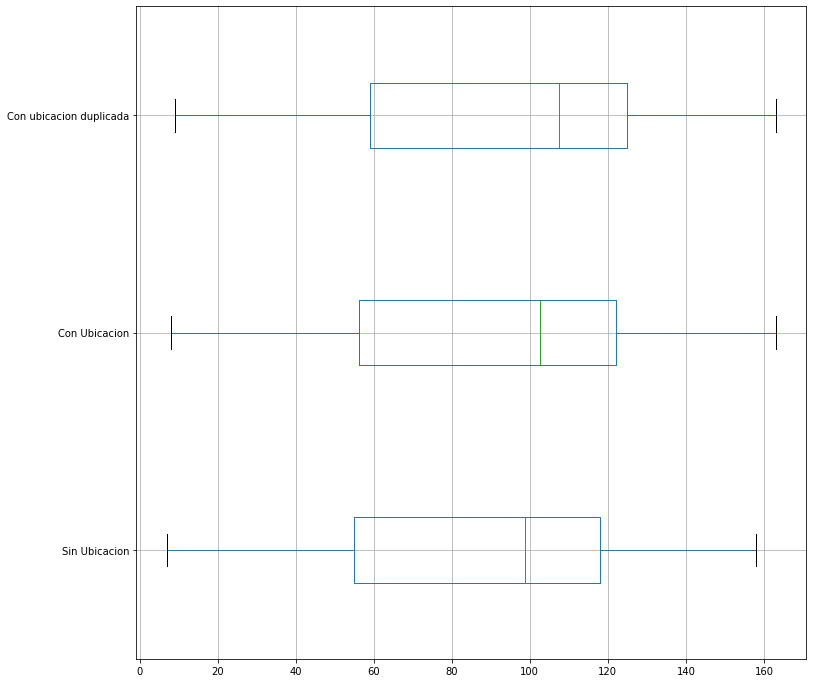

In [19]:
dfPlotBox.drop(['count']).boxplot(figsize=(12,12),vert=False)

Analizo la longitud promedio de los twits con ubicacion

In [20]:
datos['location'].fillna(value='sinUbicacion',inplace=True)
datos['location'].value_counts()

sinUbicacion                     2533
USA                               104
New York                           71
United States                      50
London                             45
                                 ... 
southern california                 1
WESTSIDE OF PHILLY 7? BLOCK??       1
??? ???? ?f glory. ?                1
NJ/NYC                              1
Philippines                         1
Name: location, Length: 3342, dtype: int64

In [39]:
grouped = datos[datos.duplicated(subset=['location'],keep=False)].groupby('location').agg({'longitudTweet':['mean','max','min','std','sum']}).longitudTweet.sort_values(by=['sum'],ascending=False)
grouped.head(10)

,mean,max,min,std,sum
location,,,,,
sinUbicacion,98.893802,158,7,34.687788,250498
USA,108.923077,150,58,23.368177,11328
New York,131.295775,141,11,22.227007,9322
United States,100.600000,144,24,32.630273,5030
London,107.488889,144,12,36.472045,4837
Nigeria,120.964286,142,53,23.498593,3387
UK,116.592593,142,55,23.082226,3148
Canada,106.310345,141,36,28.990274,3083
"Los Angeles, CA",114.423077,141,60,21.109568,2975


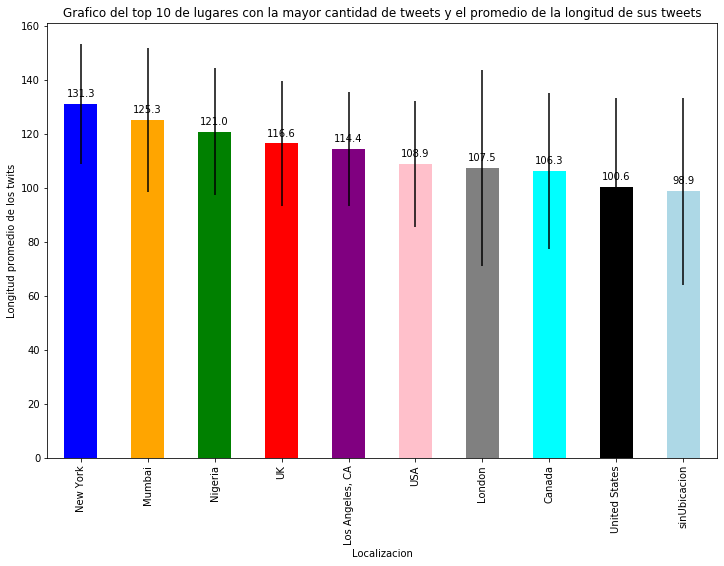

In [54]:
ax = grouped.head(10)['mean'].sort_values(ascending=False).plot.bar(figsize=(12, 8),yerr=(grouped.head(10)['std']),
        color=['blue','orange','green','red','purple','pink','gray','cyan','k','lightblue','yellow','teal','lime'],
        title='Grafico del top 10 de lugares con la mayor cantidad de tweets y el promedio de la longitud de sus tweets')
ax.set_xlabel('Localizacion')
ax.set_ylabel('Longitud promedio de los twits')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

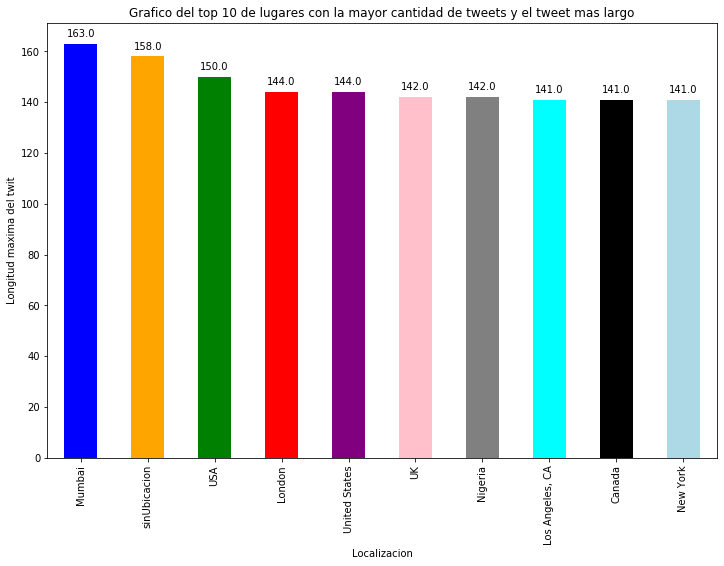

In [66]:
#hago un grafico con las ubicaciones con el twit mas largo
ax = grouped.head(10)['max'].sort_values(ascending=False).plot.bar(figsize=(12, 8),
        color=['blue','orange','green','red','purple','pink','gray','cyan','k','lightblue','yellow','teal','lime'],
        title='Grafico del top 10 de lugares con la mayor cantidad de tweets y el tweet mas largo')
ax.set_xlabel('Localizacion')
ax.set_ylabel('Longitud maxima del twit')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

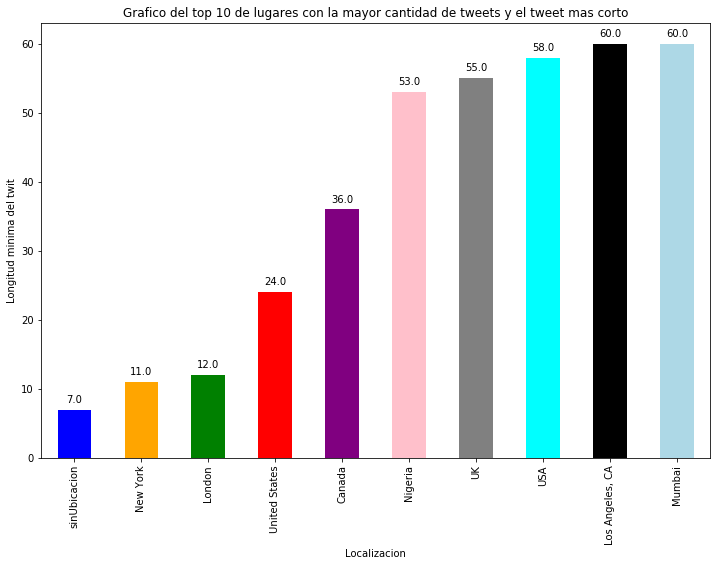

In [67]:
#ubicaciones con el twit mas corto
ax = grouped.head(10)['min'].sort_values(ascending=True).plot.bar(figsize=(12, 8),
color=['blue','orange','green','red','purple','pink','gray','cyan','k','lightblue','yellow','teal','lime'],
title='Grafico del top 10 de lugares con la mayor cantidad de tweets y el tweet mas corto')
ax.set_xlabel('Localizacion')
ax.set_ylabel('Longitud minima del twit')
ax.set_ylim(bottom=0)
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("image.png")

In [81]:
grouped = datos[datos.duplicated(subset=['location'],keep=False)].groupby(
    'location').agg({'target':['mean','sum','count']}).target.sort_values(by=['count'],ascending=False)
grouped.head(10)

,mean,sum,count
location,,,
sinUbicacion,0.424398,1075,2533
USA,0.644231,67,104
New York,0.225352,16,71
United States,0.540000,27,50
London,0.355556,16,45
Canada,0.448276,13,29
Nigeria,0.785714,22,28
UK,0.592593,16,27
"Los Angeles, CA",0.307692,8,26


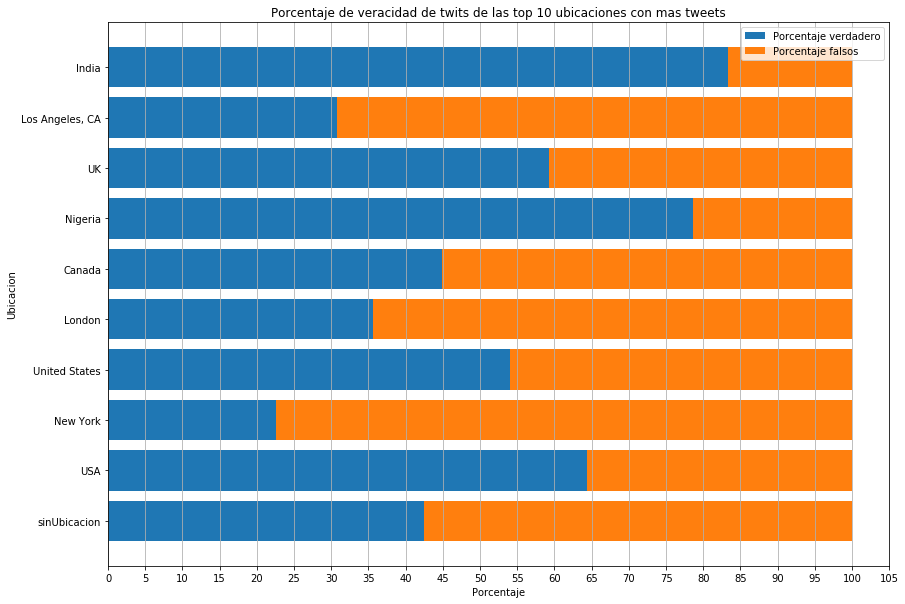

In [125]:
#hago un grafico de stacked bar 
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(14,10))
labels = grouped.head(10).reset_index()['location'].tolist()
porcentajesTrue = (100*grouped.head(10).reset_index()['mean']).tolist()
porcentajesFalse = (100*(1-grouped.head(10).reset_index()['mean'])).tolist()
ax.barh(labels, porcentajesTrue,  label='Porcentaje verdadero')
ax.barh(labels, porcentajesFalse,  left=porcentajesTrue,
       label='Porcentaje falsos')
ax.set_ylabel('Ubicacion')
ax.set_title('Porcentaje de veracidad de twits de las top 10 ubicaciones con mas tweets')
ax.set_xlabel('Porcentaje')
ax.grid(True,axis='x')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend()

plt.show()

In [156]:
grouped = datos.groupby(
    'location').agg({'target':['mean','sum','count']}).target.sort_values(by=['mean'],ascending=False).loc[grouped['count']>datos.location.count()*0.001]
grouped.head(10)

,mean,sum,count
location,,,
Mumbai,0.863636,19,22
India,0.833333,20,24
Nigeria,0.785714,22,28
"Nashville, TN",0.777778,7,9
Earth,0.727273,8,11
"Washington, DC",0.714286,15,21
"Sacramento, CA",0.700000,7,10
"Washington, D.C.",0.692308,9,13
US,0.666667,6,9


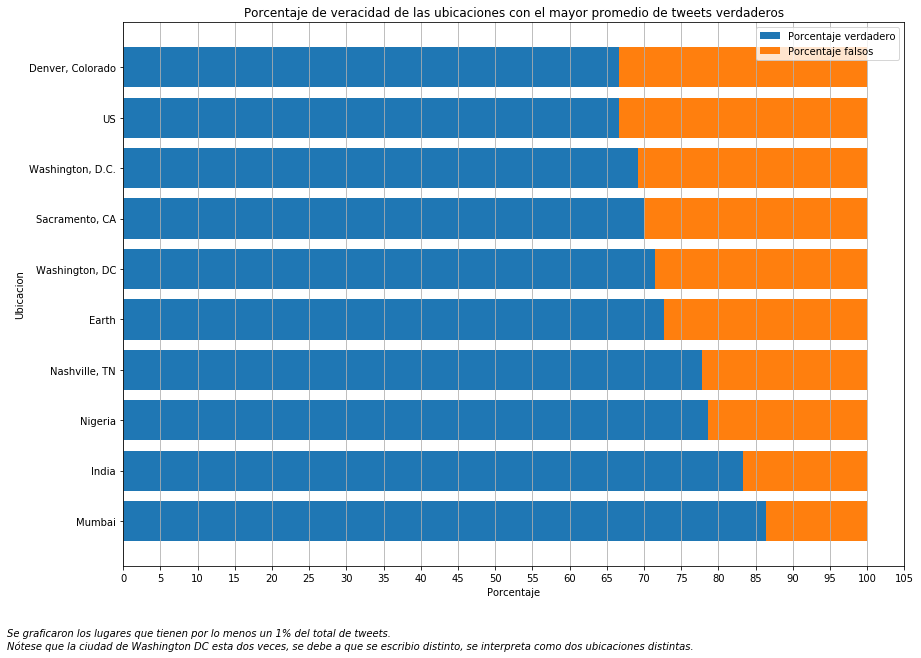

In [173]:
#hago un grafico de stacked bar 
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(14,10))
labels = grouped.head(10).reset_index()['location'].tolist()
porcentajesTrue = (100*grouped.head(10).reset_index()['mean']).tolist()
porcentajesFalse = (100*(1-grouped.head(10).reset_index()['mean'])).tolist()
ax.barh(labels, porcentajesTrue,  label='Porcentaje verdadero')
ax.barh(labels, porcentajesFalse,  left=porcentajesTrue,
       label='Porcentaje falsos')
ax.set_ylabel('Ubicacion')
ax.set_title('Porcentaje de veracidad de las ubicaciones con el mayor promedio de tweets verdaderos')
ax.set_xlabel('Porcentaje')
ax.grid(True,axis='x')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend()
plt.figtext(0.01, 0.01, 'Se graficaron los lugares que tienen por lo menos un 1% del total de tweets.\nNótese que la ciudad de Washington DC esta dos veces, se debe a que se escribio distinto, se interpreta como dos ubicaciones distintas.',fontstyle='italic')
plt.show()